# NLP


Sistema de deteccion de enlaces de spam

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv'

df = pd.read_csv(url)

df.to_csv('../data/raw/data.csv')

In [3]:
pd.set_option('display.max_colwidth', None)  # Muestra todo el contenido de cada celda

df.sample(5)

,url,is_spam
2398,https://www.morningbrew.com/daily/stories/2020/06/29/lululemon-acquires-mirror-500-million,False
2023,https://janefriedman.us2.list-manage.com/unsubscribe,True
2501,https://cheddar.com/media/fda-loosens-restrictions-on-food-labeling,False
2878,https://en.wikipedia.org/wiki/Goodhart%27s_law,False
2515,https://www.usa.gov/election-office,False


<Axes: xlabel='is_spam', ylabel='Count'>

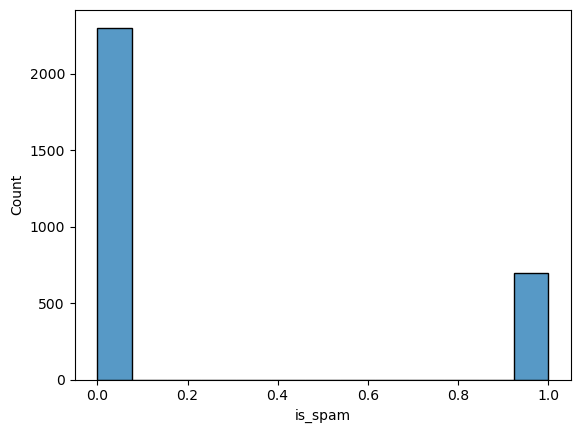

In [4]:
sns.histplot(data=df, x='is_spam')

Puedo ver que tengo unas clases desbalanceadas, esto hay que tenerlo en cuenta mas adelante al entrenar el modelo

In [5]:
import re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df["url"] = df["url"].apply(preprocess_text)
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, unsubscribe]",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True


In [6]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df["url"] = df["url"].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Carlos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carlos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",True
1,"[http, hvper]",True
2,"[http, briefingday]",True
3,"[http, briefingday, commentform]",False
4,"[http, briefingday]",True


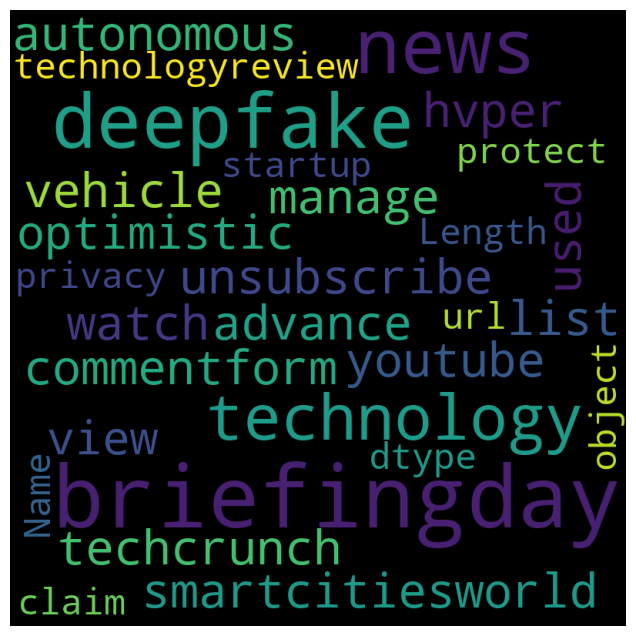

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [11]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9183333333333333

In [15]:
from pickle import dump

dump(model, open("../models/svm_classifier_linear_42.sav", "wb"))